In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
df = pd.read_csv('https://github.com/fivethirtyeight/data/raw/master/candy-power-ranking/candy-data.csv')
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


1) How many candies are in this dataset?

In [9]:
df.shape

(85, 13)

In [10]:
len(df)

85

2) How many candies have chocolate in them? How many don't?

In [14]:
# for chocolates
len(df[df['chocolate'] == 1])

37

In [16]:
# for no chocolates
len(df[df['chocolate'] == 0])

48

In [18]:
# a different way to do
df['chocolate'].value_counts()

0    48
1    37
Name: chocolate, dtype: int64

3) Let's call the last column - the 'winpercent' equivalent to an approval rating for a given candy.

What is the mean 'approval rating' for candies with chocolate? What is the mean 'approval rating' for candies without chocolate? What is the difference in these mean approval ratings?

In [39]:
# find approval rating
chocolate = df[df['chocolate'] == 1]['winpercent']
chocolate.mean()

60.9215294054054

In [44]:
non_chocolate = df[df['chocolate'] == 0]['winpercent']
non_chocolate.mean()

42.142257

In [46]:
# a different way to do this
df.groupby('chocolate')['winpercent'].mean()

chocolate
0    42.142257
1    60.921529
Name: winpercent, dtype: float64

In [47]:
# find difference
chocolate.mean() - non_chocolate.mean()

18.7792724054054

4) Now run a boostrapping example using 10,000 simulations. Use np.random.seed(42) to ensure consistency if you run again. Concatenate the chocolate approval ratings and non-chocolate approval ratings, shuffle them, and then break out new chocolate approval ratings and non-chocolate approval ratings, similar to what we did last week in class. Record the mean difference between the chocolate approval ratings and non-chocolate approval ratings.

Plot a histogram of the 10,000 differences recorded. What is the average difference?

In [80]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = np.concatenate((chocolate, non_chocolate), axis=None)
    np.random.shuffle(total)
    
    new_chocolate = total[:len(chocolate)]
    new_non_chocolate = total[len(chocolate):]
    #print(np.mean(new_chocolate) - np.mean(new_non_chocolate))
    diff.append(np.mean(new_chocolate) - np.mean(new_non_chocolate))

In [81]:
# EXPLANATION

print("total length =",len(total))
print("chocolates =",len(chocolate))
print("non_chocolate =",len(non_chocolate))


# [:len(chocolate)]  --> 0 through 37
# [len(chocolate):]  --> 37 through 85

total length = 85
chocolates = 37
non_chocolate = 48


(array([1.000e+00, 7.000e+00, 4.000e+01, 1.010e+02, 2.760e+02, 5.770e+02,
        9.410e+02, 1.329e+03, 1.687e+03, 1.644e+03, 1.401e+03, 9.880e+02,
        5.640e+02, 2.780e+02, 1.160e+02, 3.600e+01, 1.200e+01, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([-12.42740385, -11.05131427,  -9.67522469,  -8.2991351 ,
         -6.92304552,  -5.54695594,  -4.17086636,  -2.79477678,
         -1.4186872 ,  -0.04259762,   1.33349196,   2.70958154,
          4.08567113,   5.46176071,   6.83785029,   8.21393987,
          9.59002945,  10.96611903,  12.34220861,  13.71829819,
         15.09438777]),
 <a list of 20 Patch objects>)

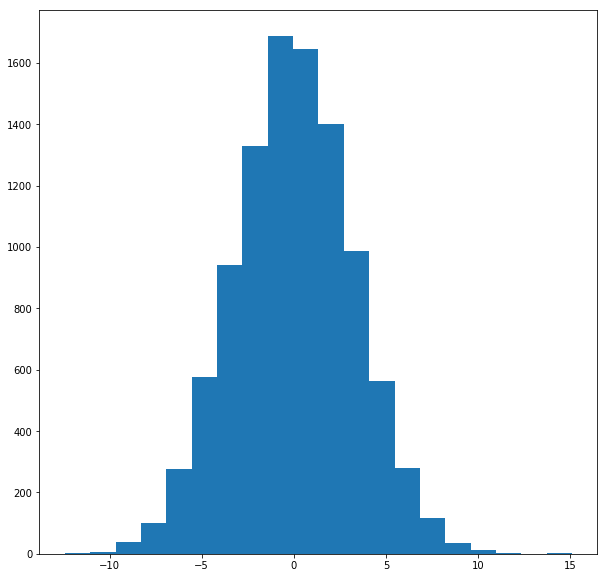

In [86]:
fig = plt.figure(figsize=(10,10))
plt.hist(results, bins=20)

In [85]:
np.mean(diff)

-0.005051429525618676

5) Say you are running a two-tailed hypothesis test, where the null hypothesis is that there is no difference in the approval rating for chocolate candies and non-chocolate candies, and the alternate hypothesis is that there is a difference in the approval rating.

If the test is at the 0.05 significance level, what are the rejection regions?

Where do the results you found earlier fit into the distribution? What is the percentile value? What is the p-value (remember, two-tailed)?

Can we reject the null hypothesis?

In [83]:
np.percentile(diff, 2.5)

-6.242496532446511

In [84]:
np.percentile(diff, 97.5)

6.322172290118249

In [87]:
stats.percentileofscore(diff, 18.77)

100.0

In [88]:
np.max(diff)

15.094387774211725

In [91]:
(1 - ((stats.percentileofscore(diff, 18.77)/100))) * 2

0.0

6) Now let's use what we've learned the past two weeks. Plot a scatter plot between the percentage of sugar for *all* candies and the approval rating for *all* candies.

In [93]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


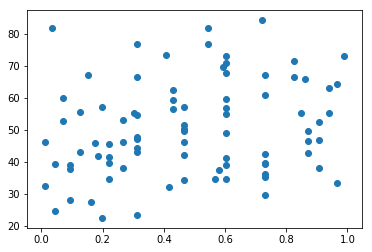

In [94]:
plt.scatter(df['sugarpercent'], df['winpercent'])

7) Do the histograms for either of the variables look skewed? If so, what transformation should we apply?

(array([10.,  8.,  8.,  8., 12.,  5., 10.,  9.,  7.,  8.]),
 array([0.011     , 0.1087    , 0.2064    , 0.30409999, 0.40179999,
        0.49949999, 0.59719999, 0.69489999, 0.79259998, 0.89029998,
        0.98799998]),
 <a list of 10 Patch objects>)

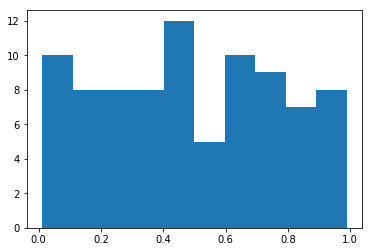

In [97]:
# fairly close to uniform
plt.hist(df['sugarpercent'])

(array([ 5.,  8., 12., 16., 10., 11.,  6.,  9.,  5.,  3.]),
 array([22.445341 , 28.6188359, 34.7923308, 40.9658257, 47.1393206,
        53.3128155, 59.4863104, 65.6598053, 71.8333002, 78.0067951,
        84.18029  ]),
 <a list of 10 Patch objects>)

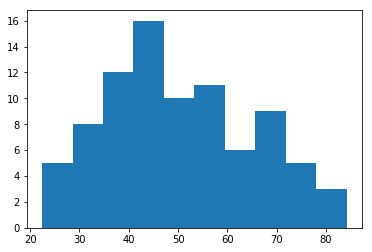

In [98]:
plt.hist(df['winpercent'])

8) What is the covariance between these two variables? What is the correlation? What does the correlation indicate about the strength of the relationship? Is the correlation statistically significant (Note you do NOT have to calculate this, it is in the correlation output via pearsonr).

9) Using the 'evaluate linear relationship' package we found in class this week, find the slope, intercept, prediction and residuals for this relationship. Re-plot the scatterplot with the predictive slope on top of it like we did in clas.

In [3]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

9) What is the R-squared value of the relationship between these two variables? What does this say when considered  with the correlation of the two variables?

BONUS 

10) Plot the confidence and prediction intervals of the linear relationship between these two variables.

In [4]:
def get_intervals(a, b, residuals):
    t = stats.t(df=len(a) - 2).ppf(0.975)
    s_err = np.sum(np.power(residuals, 2))
    confidence_interval = t * np.sqrt((s_err/(len(a) - 2))*(1/len(a) + (np.power((a - a.mean()), 2)/((np.sum(np.power(a,2))) - len(df)*(np.power(a.mean(),2))))))
    prediction_interval = t * (np.std(residuals))
    return abs(confidence_interval), prediction_interval